### Colab Activity 14.3: Using Entropy

**Expected Time = 60 minutes**



This activity focuses on using *entropy* to split nodes in a Decision Tree.  First, you will compute entropy by hand on a small example dataset.  Next, you will use the `DecisionTreeClassifier` to split based on an entropy criteria. 


$$\displaystyle H=-\sum _{i}p_{i}\log p_{i}$$

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

### Sample Data

Below, the same small titanic dataset is created for your with five rows, and assigned as `titanic` below.  

In [13]:
titanic = sns.load_dataset('titanic')[['age', 'pclass', 'survived']].head()

In [14]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [15]:
X, y = titanic.drop('survived', axis = 1), titanic.survived

[Back to top](#-Index)

### Problem 1

#### Computing the Entropy



To begin, the entropy of the data is determined by computing the probability for each class and plugging it into the `entropy` formula.  Use the data in `df` to compute the entropy for all the data and assign it as a float to `all_entropy` below. 

**NOTE**:  use `np.log2` to compute the logarithm. 

In [16]:

all_entropy = -(.4*np.log2(.4) + .6*np.log2(0.6))


# Answer check
print(all_entropy)

0.9709505944546686


[Back to top](#-Index)

### Problem 2

#### Splitting Data



Now, consider splitting the data where `pclass = 1`.   

Compute the entropy for each class as `ent_pclass1` and `ent_pclass3` respectively.  

In [17]:

ent_pclass1 = -1*np.log2(1)
ent_pclass3 = -(2/3*np.log2(2/3) + 1/3*np.log2(1/3))


# Answer check
print(f'Left node: {ent_pclass1: .2f}\nRight Node: {ent_pclass3: .2f}')

Left node: -0.00
Right Node:  0.92


[Back to top](#-Index)

### Problem 3

#### Weighting the Entropy

Because the split doesn't produce equal sized groups, we want to weight the entropy based on the size of the data in the node.  Use the proportion of data in the respective nodes to compute the total entropy by summing the weighted entropy values below. Assign as a float to `pclass_entropy` below. 

In [18]:

ent_pclass1 = -1*np.log2(1)
ent_pclass3 = -(2/3*np.log2(2/3) + 1/3*np.log2(1/3))
pclass_entropy = (2/5) * ent_pclass1 + (3/5) * ent_pclass3



# Answer check
print(f'Entropy for passenger class: {pclass_entropy: .2f}')

Entropy for passenger class:  0.55


[Back to top](#-Index)

### Problem 4

#### Entropy based on `age < 23`



Compute the weighted sum of the entropy based on splitting based on `age < 23`.  Assign this to `entropy_age` below.  

In [19]:
titanic

,age,pclass,survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0


In [20]:

ent_age1 = 0
ent_age2 = -(1/4*np.log2(1/4) + 3/4*np.log2(3/4))
entropy_age = 4/5*ent_age2 + 1/5*ent_age1


# Answer check
print(entropy_age)

0.6490224995673063


[Back to top](#-Index)

### Problem 5

#### Minimizing Entropy



Use the `DecisionTreeClassifier` with `max_depth = 1` and `criterion = 'entropy'` to fit the data `X` and `y` and assign the result to `dtree`.

Next, use the `plot_tree` function with arguments `dtree`, `feature_names=X.columns`, and `filled = True` to
identify as the optimal splitting criterion. Assign the plot of the tree to `entropy_tree` below.  

[Text(0.5, 0.75, 'pclass <= 2.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.625, 0.5, '  False')]

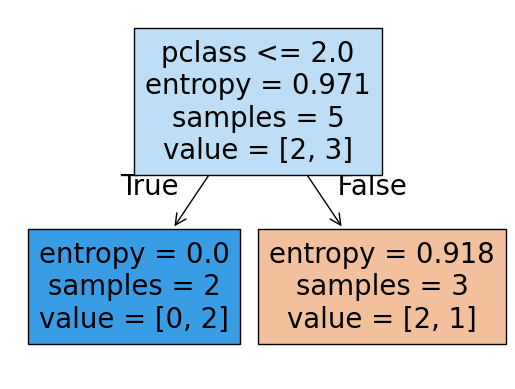

In [21]:

dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 1).fit(X, y)
entropy_tree = plot_tree(dtree, feature_names=X.columns, filled = True)


# Answer check
entropy_tree